In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [9]:
df = pd.read_csv(
    '../Datasets/perrin-freres-monthly-champagne.csv',
    index_col='Month',
    skipfooter=2,
    parse_dates=True)

/var/folders/pm/717hp7y52f1gx9gr4nnn727m0000gn/T/ipykernel_90032/3929526086.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [10]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<Axes: xlabel='Month'>

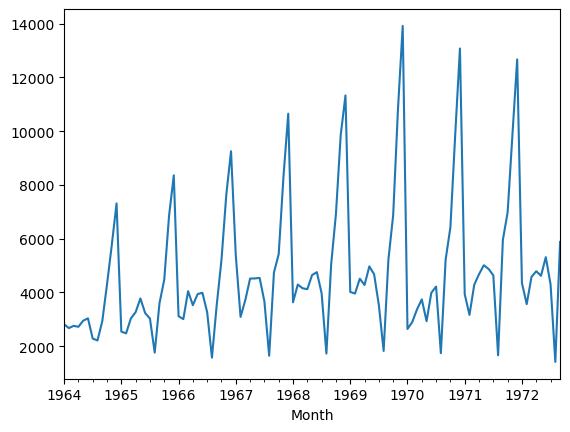

In [11]:
df.columns = ['Sales']
df['Sales'].plot()

In [12]:
df.index.freq = 'MS'
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

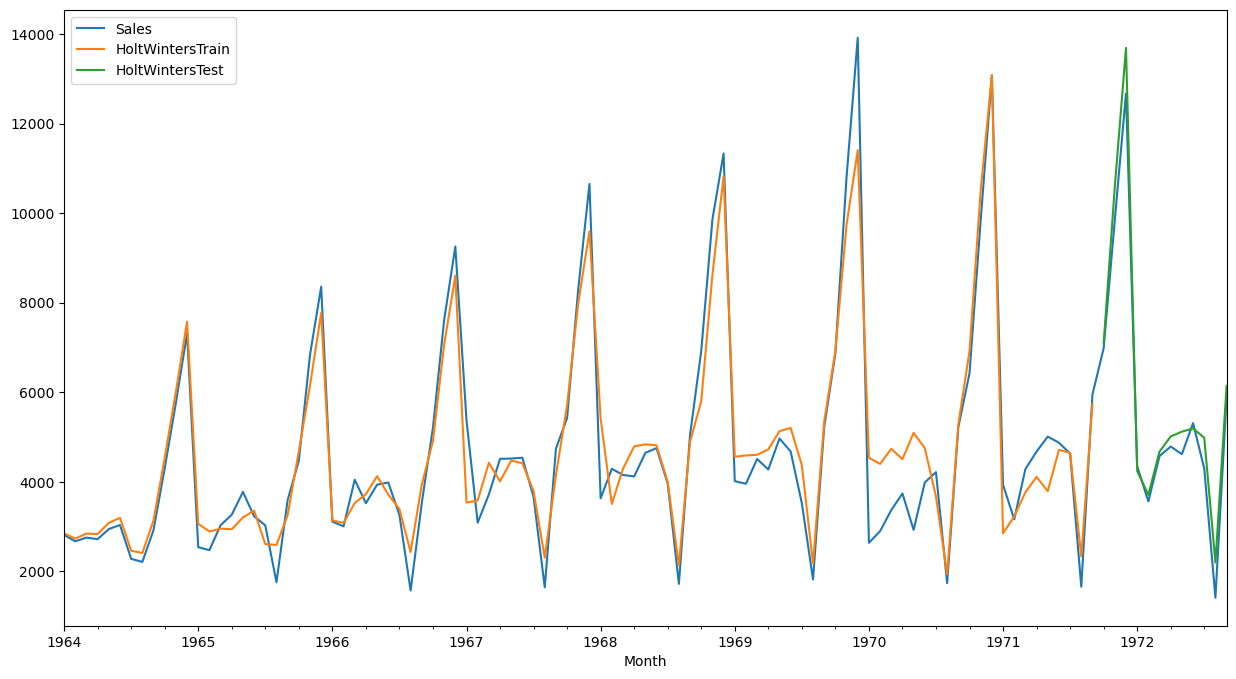

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15, 8));

In [14]:
r2_score(train['Sales'], res_hw.fittedvalues)

0.9169984903500262

In [9]:
r2_score(test['Sales'], res_hw.forecast(Ntest))

0.9735862390084439